In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

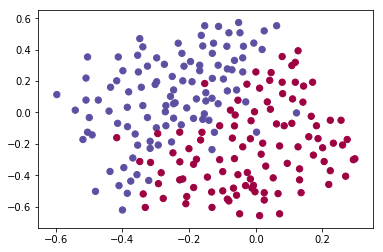

In [2]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [19]:
def model(X, Y, num_iterations=30000, learning_rate=0.3, print_cost=True, lambd=0, keep_prob=1):
    
    grads = {}
    costs = []
    m = X.shape[1]
    
    layer_dims = [X.shape[0], 20, 3, 1]
    parameters = initialize_parameters(layer_dims)
    
    for i in range(num_iterations):
        
        if keep_prob == 1:
            A3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            A3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        if lambd:
            cost = compute_cost_with_regularization(A3, Y, parameters, lambd)
        else:
            cost= compute_cost(A3, Y)
            
        assert (lambd == 0 or keep_prob == 1)
        
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd > 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
            
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Cost after {}th iteration: {}".format(i, cost))
        if i % 1000 == 0:
            costs.append(cost)
            
    plt.xlabel("No. of iterations (1000s)")
    plt.ylabel("Cost")
    plt.plot(costs)
    plt.show()
    
    return parameters

Cost after 0th iteration: 0.655741252348
Cost after 1000th iteration: 0.222266938685
Cost after 2000th iteration: 0.202887026076
Cost after 3000th iteration: 0.182514979247
Cost after 4000th iteration: 0.180539783062
Cost after 5000th iteration: 0.176204717584
Cost after 6000th iteration: 0.168327303921
Cost after 7000th iteration: 0.165835936547
Cost after 8000th iteration: 0.163126719145
Cost after 9000th iteration: 0.159426122532
Cost after 10000th iteration: 0.163299875257
Cost after 11000th iteration: 0.160986144878
Cost after 12000th iteration: 0.157644741482
Cost after 13000th iteration: 0.152135996442
Cost after 14000th iteration: 0.14843713519
Cost after 15000th iteration: 0.147964009226
Cost after 16000th iteration: 0.146348763064
Cost after 17000th iteration: 0.146343758631
Cost after 18000th iteration: 0.143350885374
Cost after 19000th iteration: 0.139364883623
Cost after 20000th iteration: 0.138516424233
Cost after 21000th iteration: 0.141186783518
Cost after 22000th itera

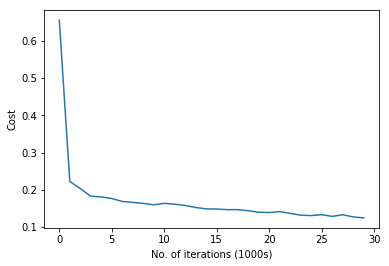

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [4]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

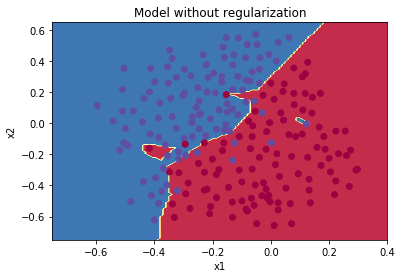

In [5]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [12]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_loss = compute_cost(A3, Y)
    
    L2_regularization_cost = (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3))) / (2*m) * lambd
    
    cost = cross_entropy_loss + L2_regularization_cost
    
    return cost

In [13]:
A3, Y_assess, parameters = compute_cost_with_regularization_test_case()

print("cost = " + str(compute_cost_with_regularization(A3, Y_assess, parameters, lambd = 0.1)))

cost = 1.7864859451590758


In [16]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    dW3 = 1./m * np.dot(dZ3, A2.T) + W3 * lambd / m
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) + W2 * lambd / m
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T) + W1 * lambd / m
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [17]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(X_assess, Y_assess, cache, lambd = 0.7)
print ("dW1 = "+ str(grads["dW1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("dW3 = "+ str(grads["dW3"]))

dW1 = [[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = [[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = [[-1.77691347 -0.11832879 -0.09397446]]


Cost after 0th iteration: 0.691490278318
Cost after 1000th iteration: 0.267969150879
Cost after 2000th iteration: 0.264856715123
Cost after 3000th iteration: 0.264228120546
Cost after 4000th iteration: 0.263615070527
Cost after 5000th iteration: 0.263086624564
Cost after 6000th iteration: 0.262731593619
Cost after 7000th iteration: 0.262512275104
Cost after 8000th iteration: 0.262140102429
Cost after 9000th iteration: 0.261894650342
Cost after 10000th iteration: 0.261696587842
Cost after 11000th iteration: 0.261592350133
Cost after 12000th iteration: 0.261379790122
Cost after 13000th iteration: 0.261504004686
Cost after 14000th iteration: 0.261205389806
Cost after 15000th iteration: 0.261647322019
Cost after 16000th iteration: 0.26152458524
Cost after 17000th iteration: 0.261374775537
Cost after 18000th iteration: 0.261317854873
Cost after 19000th iteration: 0.261421422616
Cost after 20000th iteration: 0.261463739419
Cost after 21000th iteration: 0.261423321124
Cost after 22000th itera

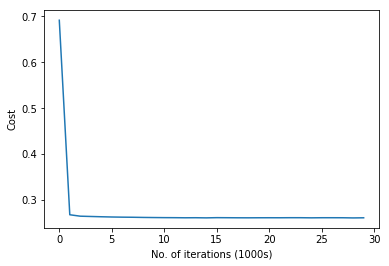

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.955


In [24]:
parameters = model(train_X, train_Y, lambd = 0.6)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

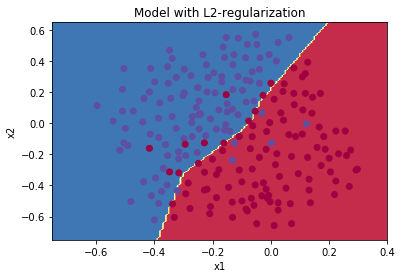

In [25]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)